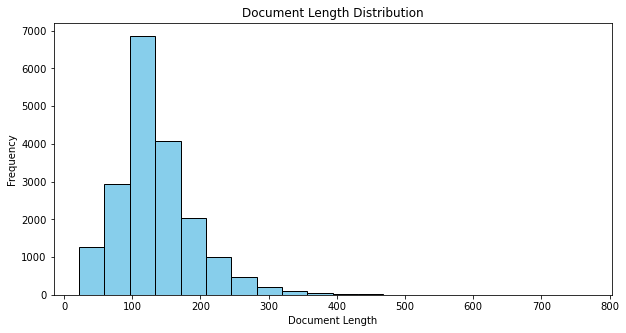

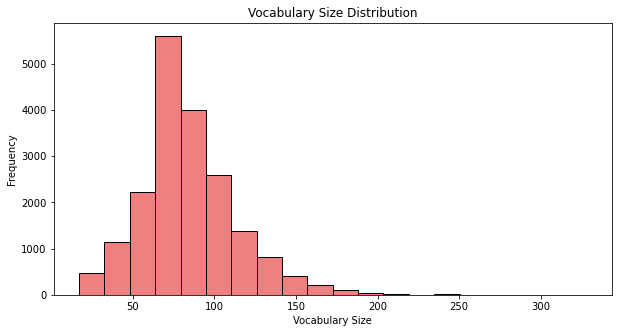

Basic Statistics:
       document_length  vocabulary_size
count     19035.000000     19035.000000
mean        134.165485        84.153559
std          57.162927        29.162581
min          22.000000        17.000000
25%          99.000000        66.000000
50%         124.000000        80.000000
75%         160.000000        99.000000
max         766.000000       328.000000

Sample Documents:
0    Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...
1    Following the disbandment of Destiny's Child i...
2    A self-described "modern-day feminist", Beyonc...
3    Beyoncé Giselle Knowles was born in Houston, T...
4    Beyoncé attended St. Mary's Elementary School ...
Name: document, dtype: object


In [9]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize

# Load the dataset
file_path = "/Users/filippotorrisi/Desktop/Advanced_TML/Dataset/train-v2.0.json"
with open(file_path, 'r') as file:
    data = json.load(file)

# Extract paragraphs from the dataset
paragraphs = [paragraph["context"] for topic in data["data"] for paragraph in topic["paragraphs"]]

# Create a DataFrame for better analysis
df = pd.DataFrame(paragraphs, columns=['document'])

# Calculate document length and vocabulary size
df['document_length'] = df['document'].apply(lambda doc: len(word_tokenize(doc)))
df['vocabulary_size'] = df['document'].apply(lambda doc: len(set(word_tokenize(doc))))

# Visualize document length distribution
plt.figure(figsize=(10, 5))
plt.hist(df['document_length'], bins=20, color='skyblue', edgecolor='black')
plt.title('Document Length Distribution')
plt.xlabel('Document Length')
plt.ylabel('Frequency')
plt.show()

# Visualize vocabulary size distribution
plt.figure(figsize=(10, 5))
plt.hist(df['vocabulary_size'], bins=20, color='lightcoral', edgecolor='black')
plt.title('Vocabulary Size Distribution')
plt.xlabel('Vocabulary Size')
plt.ylabel('Frequency')
plt.show()

# Display basic statistics
print("Basic Statistics:")
print(df[['document_length', 'vocabulary_size']].describe())

# Display a few sample documents
print("\nSample Documents:")
print(df['document'].head())


/Users/filippotorrisi/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


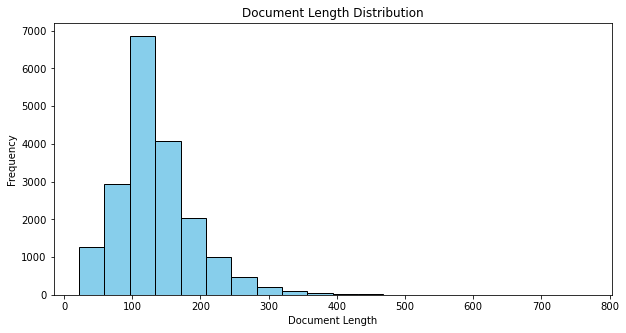

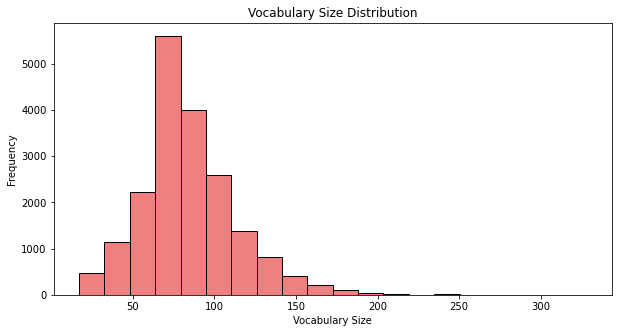

Basic Statistics:
       document_length  vocabulary_size
count     19035.000000     19035.000000
mean        134.165485        84.153559
std          57.162927        29.162581
min          22.000000        17.000000
25%          99.000000        66.000000
50%         124.000000        80.000000
75%         160.000000        99.000000
max         766.000000       328.000000


In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE
import numpy as np
import plotly.express as px
import random

# Load the dataset
file_path = "/Users/filippotorrisi/Desktop/Advanced_TML/Dataset/train-v2.0.json"
with open(file_path, 'r') as file:
    data = json.load(file)

# Extract paragraphs from the dataset
paragraphs = [paragraph["context"] for topic in data["data"] for paragraph in topic["paragraphs"]]

# Create a DataFrame for better analysis
df = pd.DataFrame(paragraphs, columns=['document'])

# Calculate document length and vocabulary size
df['document_length'] = df['document'].apply(lambda doc: len(word_tokenize(doc)))
df['vocabulary_size'] = df['document'].apply(lambda doc: len(set(word_tokenize(doc))))

# Visualize document length distribution
plt.figure(figsize=(10, 5))
plt.hist(df['document_length'], bins=20, color='skyblue', edgecolor='black')
plt.title('Document Length Distribution')
plt.xlabel('Document Length')
plt.ylabel('Frequency')
plt.show()

# Visualize vocabulary size distribution
plt.figure(figsize=(10, 5))
plt.hist(df['vocabulary_size'], bins=20, color='lightcoral', edgecolor='black')
plt.title('Vocabulary Size Distribution')
plt.xlabel('Vocabulary Size')
plt.ylabel('Frequency')
plt.show()

# Display basic statistics
print("Basic Statistics:")
print(df[['document_length', 'vocabulary_size']].describe())

In [10]:


# Create a DataFrame
df = pd.DataFrame({"Question": questions, "Answer": answers})

# Display the first few rows of the DataFrame
print(df.head())


                                            Question               Answer
0           When did Beyonce start becoming popular?    in the late 1990s
1  What areas did Beyonce compete in when she was...  singing and dancing
2  When did Beyonce leave Destiny's Child and bec...                 2003
3      In what city and state did Beyonce  grow up?        Houston, Texas
4         In which decade did Beyonce become famous?           late 1990s


In [2]:

# Train Word2Vec embeddings
tokenized_sentences = [word_tokenize(doc) for doc in df['document']]
model_all = Word2Vec(tokenized_sentences, vector_size=30, min_count=5, window=10)

# Keyword search
def keyword_search(query, model):
    # Find the most similar words to the query
    similar_words = model.wv.most_similar(query)
    return similar_words

# Example keyword search
search_term = 'Beyoncé'
results_all = keyword_search(search_term, model_all)

print(f"\nKeyword Search Results for '{search_term}' in Full Model:")
print(results_all)

# Visualization using t-SNE
sample_size = 500
sample_all = random.sample(list(model_all.wv.key_to_index), sample_size)
word_vectors_all = model_all.wv[sample_all]
tsne = TSNE(n_components=3, n_iter=2000)
tsne_embedding_all = tsne.fit_transform(word_vectors_all)

x, y, z = np.transpose(tsne_embedding_all)
fig = px.scatter_3d(x=x, y=y, z=z, text=sample_all)
fig.update_traces(marker=dict(size=3, line=dict(width=2)), textfont_size=10)
fig.show()



Keyword Search Results for 'Beyoncé' in Full Model:
[('album', 0.935400664806366), ('Madonna', 0.920708417892456), ('Destiny', 0.91043621301651), ('MTV', 0.8976090550422668), ('Grammy', 0.8967815637588501), ('solo', 0.8916027545928955), ('studio', 0.8782638907432556), ('released', 0.8716675043106079), ('albums', 0.8705937266349792), ('Mercury', 0.8695902228355408)]


/Users/filippotorrisi/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/filippotorrisi/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [13]:
def keyword_search(query, model):
    # Check if the query term is in the vocabulary
    if query in model.wv.key_to_index:
        # Find the most similar words to the query
        similar_words = model.wv.most_similar(query)
        return similar_words
    else:
        return f"Query term '{query}' not present in the vocabulary."

# Example keyword search
search_term = 'beyonce'
results_all = keyword_search(search_term, model_all)
print(f"\nKeyword Search Results for '{search_term}' in Full Model:")
print(results_all)



Keyword Search Results for 'beyonce' in Full Model:
Query term 'beyonce' not present in the vocabulary.
